In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing

import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

2023-08-07 20:53:57.357041: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-07 20:53:57.394113: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-07 20:53:57.395705: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 20:53:58.231533: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
df = pd.read_csv('./data/df_clean.csv')
df.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Nac_Direction_Avg,logs_Remark,fail_Remark,fail,block_id,status,block_len,off_start,prior_7d_off,prior_1h_off
0,T01,2016-01-01 00:00:00,1277.4,1226.1,1249.0,9.0,41.0,58.0,59.0,58.0,...,218.5,NaN,NaN,0,1,off - low wind,1,0,0,0
1,T01,2016-01-01 00:10:00,1268.3,93.3,999.7,435.9,41.0,58.0,59.0,59.0,...,218.5,"Generator 1 in, External power ref.:2000kW",NaN,0,2,on,13,0,0,0
2,T01,2016-01-01 00:20:00,1394.4,220.3,774.0,486.1,41.0,57.0,57.0,57.0,...,213.3,NaN,NaN,0,2,on,13,0,0,0
3,T01,2016-01-01 00:30:00,1306.6,1212.4,1257.1,17.0,40.0,56.0,57.0,57.0,...,222.4,NaN,NaN,0,2,on,13,0,0,0
4,T01,2016-01-01 00:40:00,1320.9,1224.1,1257.7,18.0,40.0,57.0,58.0,57.0,...,222.4,External power ref.:2000kW,NaN,0,2,on,13,0,0,0


In [5]:
# x columns
x_cols = [
    'Gen_RPM_Avg','Gen_Bear_Temp_Avg','Gen_Bear2_Temp_Avg','Gen_Phase1_Temp_Avg','Gen_Phase2_Temp_Avg','Gen_Phase3_Temp_Avg','Hyd_Oil_Temp_Avg','Gear_Oil_Temp_Avg','Gear_Bear_Temp_Avg','Nac_Temp_Avg',
    'HVTrafo_Phase1_Temp_Avg','HVTrafo_Phase2_Temp_Avg','HVTrafo_Phase3_Temp_Avg','Grd_InverterPhase1_Temp_Avg','Cont_Top_Temp_Avg','Cont_Hub_Temp_Avg','Cont_VCP_Temp_Avg',
    'Gen_SlipRing_Temp_Avg','Spin_Temp_Avg',
    'Rtr_RPM_Avg','Grd_Prod_Pwr_Avg',
    'Amb_Temp_Avg','Amb_WindSpeed_Avg']

# get 2 months prior to the stop
df_x = df[['Timestamp','Turbine_ID'] + x_cols + ['status','logs_Remark','fail_Remark']].dropna(how='any', subset=x_cols)
x = df_x[x_cols].values

# # fit model
# gmm = GaussianMixture(n_components=8)
# gmm.fit(x)

# # get predictions
# labels = gmm.predict(x)
# log_likelihood = gmm.score_samples(x)

In [36]:
np.percentile(log_likelihood, 0.025), np.percentile(log_likelihood, 0.975)

(-223.73043718765774, -75.27198554757481)

In [37]:
log_likelihood.min(), log_likelihood.max()

(-1143.4008142015603, -35.04726823027146)

## Without normalization

In [3]:
#_____ x columns and data imputation
x_cols = [
    'Gen_RPM_Avg','Gen_Bear_Temp_Avg','Gen_Bear2_Temp_Avg','Gen_Phase1_Temp_Avg','Gen_Phase2_Temp_Avg','Gen_Phase3_Temp_Avg','Hyd_Oil_Temp_Avg','Gear_Oil_Temp_Avg','Gear_Bear_Temp_Avg','Nac_Temp_Avg',
    'HVTrafo_Phase1_Temp_Avg','HVTrafo_Phase2_Temp_Avg','HVTrafo_Phase3_Temp_Avg','Grd_InverterPhase1_Temp_Avg','Cont_Top_Temp_Avg','Cont_Hub_Temp_Avg','Cont_VCP_Temp_Avg',
    'Gen_SlipRing_Temp_Avg','Spin_Temp_Avg',
    'Rtr_RPM_Avg','Grd_Prod_Pwr_Avg',
    'Amb_Temp_Avg','Amb_WindSpeed_Avg']
df_x = df[['Timestamp','Turbine_ID'] + x_cols + ['status','logs_Remark','fail_Remark']]

# data imputation
ffil_cols = [
    'Gen_Bear_Temp_Avg','Gen_Bear2_Temp_Avg','Gen_Phase1_Temp_Avg','Gen_Phase2_Temp_Avg','Gen_Phase3_Temp_Avg','Hyd_Oil_Temp_Avg','Gear_Oil_Temp_Avg','Gear_Bear_Temp_Avg','Nac_Temp_Avg',
    'HVTrafo_Phase1_Temp_Avg','HVTrafo_Phase2_Temp_Avg','HVTrafo_Phase3_Temp_Avg','Grd_InverterPhase1_Temp_Avg','Cont_Top_Temp_Avg','Cont_Hub_Temp_Avg','Cont_VCP_Temp_Avg',
    'Gen_SlipRing_Temp_Avg','Spin_Temp_Avg',
    'Amb_Temp_Avg','Amb_WindSpeed_Avg']
df_x[ffil_cols] = df_x.groupby(['Turbine_ID'])[ffil_cols].ffill()

zfil_cols = ['Gen_RPM_Avg', 'Rtr_RPM_Avg', 'Grd_Prod_Pwr_Avg']
df_x[zfil_cols] = df_x[zfil_cols].fillna(0)

# get x values
# x = df_x[x_cols].values

# #_____ fit model
# for n in range(3, 12):
#     gmm = GaussianMixture(n_components=n)
#     gmm.fit(x)

#     # get predictions
#     labels = gmm.predict(x)
#     log_likelihood = gmm.score_samples(x)

#     #_____ threshold
#     for th in np.arange(np.percentile(log_likelihood, 0.025), np.percentile(log_likelihood, 0.975), 0.5):
#         df_x['anomaly'] = [log_likelihood < th][0]

#         # evaluate anomaly as indicator for failures in future time window
#         w = int(60*24*7/10)*3 # weeks window
#         f = int(60*24*7/10)*4 # weeks ahead for window start

#         df_x['fail'] = np.where(df_x.status.isin(['off','failure']), 1, 0)
#         df_x['fut_fail'] = np.where(df_x.status.isin(['off','failure']), 1, 0)
#         df_x.fut_fail = df_x.groupby('Turbine_ID')['fut_fail'].rolling(window=w, min_periods=1).max().reset_index(level=0, drop=True)
#         df_x.fut_fail = df_x.groupby(['Turbine_ID'])['fut_fail'].shift(-f - w)

#         precision = (df_x[df_x.anomaly==1].anomaly * df_x[df_x.anomaly==1].fut_fail).mean()
#         perc_anom = df_x.anomaly.mean() * 100
#         if precision > best[1]:
#             best = ( th, precision, perc_anom)
#         # print(f'Threshold {th}, {np.round(precision*100,2)} precision, {np.round(perc_anom*100,3)}% of anomalies')
#         # print(f'{np.round((df_x[df_x.anomaly==1].anomaly * df_x[df_x.anomaly==1].fut_fail).mean()*100,2)} true positives')
#     # print(f'Baseline {np.round((df_x.fut_fail).mean()*100,2)}%')
#     print(f'{n} components: ', best)

## Normalized values

In [4]:
#_____ x columns and data imputation
x_cols = [
    'Gen_RPM_Avg','Gen_Bear_Temp_Avg','Gen_Bear2_Temp_Avg','Gen_Phase1_Temp_Avg','Gen_Phase2_Temp_Avg','Gen_Phase3_Temp_Avg','Hyd_Oil_Temp_Avg','Gear_Oil_Temp_Avg','Gear_Bear_Temp_Avg','Nac_Temp_Avg',
    'HVTrafo_Phase1_Temp_Avg','HVTrafo_Phase2_Temp_Avg','HVTrafo_Phase3_Temp_Avg','Grd_InverterPhase1_Temp_Avg','Cont_Top_Temp_Avg','Cont_Hub_Temp_Avg','Cont_VCP_Temp_Avg',
    'Gen_SlipRing_Temp_Avg','Spin_Temp_Avg',
    'Rtr_RPM_Avg','Grd_Prod_Pwr_Avg',
    'Amb_Temp_Avg','Amb_WindSpeed_Avg']
df_x = df[['Timestamp','Turbine_ID'] + x_cols + ['status','logs_Remark','fail_Remark']]

# data imputation
ffil_cols = [
    'Gen_Bear_Temp_Avg','Gen_Bear2_Temp_Avg','Gen_Phase1_Temp_Avg','Gen_Phase2_Temp_Avg','Gen_Phase3_Temp_Avg','Hyd_Oil_Temp_Avg','Gear_Oil_Temp_Avg','Gear_Bear_Temp_Avg','Nac_Temp_Avg',
    'HVTrafo_Phase1_Temp_Avg','HVTrafo_Phase2_Temp_Avg','HVTrafo_Phase3_Temp_Avg','Grd_InverterPhase1_Temp_Avg','Cont_Top_Temp_Avg','Cont_Hub_Temp_Avg','Cont_VCP_Temp_Avg',
    'Gen_SlipRing_Temp_Avg','Spin_Temp_Avg',
    'Amb_Temp_Avg','Amb_WindSpeed_Avg']
df_x[ffil_cols] = df_x.groupby(['Turbine_ID'])[ffil_cols].ffill()

zfil_cols = ['Gen_RPM_Avg', 'Rtr_RPM_Avg', 'Grd_Prod_Pwr_Avg']
df_x[zfil_cols] = df_x[zfil_cols].fillna(0)

#_____ normalize df
df_x_norm = df_x[['Timestamp','Turbine_ID'] + x_cols + ['status','logs_Remark','fail_Remark']]
df_x_norm[x_cols] = (df_x[x_cols] - df_x[x_cols].mean()) / df_x_norm[x_cols].std()

# get x values
x_norm = df_x_norm[x_cols].values


In [7]:
#_____ fit model
gmm = GaussianMixture(n_components=8)
gmm.fit(x_norm)

# get predictions
labels = gmm.predict(x_norm)
log_likelihood = gmm.score_samples(x_norm)

#_____ threshold
for th in np.arange(np.percentile(log_likelihood, 0.025), np.percentile(log_likelihood, 0.975), 0.5):
    df_x_norm['anomaly'] = [log_likelihood < th][0]

    # evaluate anomaly as indicator for failures in future time window
    w = int(60*24*7/10)*3 # weeks window
    f = int(60*24*7/10)*4 # weeks ahead for window start

    df_x_norm['fail'] = np.where(df_x_norm.status.isin(['off','failure']), 1, 0)
    df_x_norm['fut_fail'] = np.where(df_x_norm.status.isin(['off','failure']), 1, 0)
    df_x_norm.fut_fail = df_x_norm.groupby('Turbine_ID')['fut_fail'].rolling(window=w, min_periods=1).max().reset_index(level=0, drop=True)
    df_x_norm.fut_fail = df_x_norm.groupby(['Turbine_ID'])['fut_fail'].shift(-f - w)

    precision = (df_x_norm[df_x_norm.anomaly==1].anomaly * df_x_norm[df_x_norm.anomaly==1].fut_fail).mean()
    perc_anom = df_x_norm.anomaly.mean() * 100
    print( th, precision, perc_anom )

-51.43410719965521 0.5471698113207547 0.02517479860161119
-50.93410719965521 0.5555555555555556 0.025649794801641587
-50.43410719965521 0.5555555555555556 0.025649794801641587
-49.93410719965521 0.5625 0.026599787201702387
-49.43410719965521 0.5663716814159292 0.026837285301717584
-48.93410719965521 0.5739130434782609 0.027312281501747988
-48.43410719965521 0.5739130434782609 0.027549779601763184
-47.93410719965521 0.5775862068965517 0.027787277701778385
-47.43410719965521 0.5785123966942148 0.028974768201854382
-46.93410719965521 0.5819672131147541 0.029212266301869586
-46.43410719965521 0.5853658536585366 0.029449764401884786
-45.93410719965521 0.5853658536585366 0.029449764401884786
-45.43410719965521 0.5826771653543307 0.030637254901960783
-44.93410719965521 0.5826771653543307 0.030637254901960783
-44.43410719965521 0.5923076923076923 0.03134974920200638
-43.93410719965521 0.6015037593984962 0.03206224350205198
-43.43410719965521 0.6058394160583942 0.03301223590211278
-42.934107199

In [8]:
scaler = preprocessing.StandardScaler()
x_norm = scaler.fit_transform(df_x[x_cols].values)

In [9]:
#_____ fit model
gmm = GaussianMixture(n_components=8)
gmm.fit(x_norm)

# get predictions
labels = gmm.predict(x_norm)
log_likelihood = gmm.score_samples(x_norm)

#_____ threshold
for th in np.arange(np.percentile(log_likelihood, 0.025), np.percentile(log_likelihood, 0.975), 0.5):
    df_x_norm['anomaly'] = [log_likelihood < th][0]

    # evaluate anomaly as indicator for failures in future time window
    w = int(60*24*7/10)*3 # weeks window
    f = int(60*24*7/10)*4 # weeks ahead for window start

    df_x['fail'] = np.where(df_x_norm.status.isin(['off','failure']), 1, 0)
    df_x_norm['fut_fail'] = np.where(df_x_norm.status.isin(['off','failure']), 1, 0)
    df_x_norm.fut_fail = df_x_norm.groupby('Turbine_ID')['fut_fail'].rolling(window=w, min_periods=1).max().reset_index(level=0, drop=True)
    df_x_norm.fut_fail = df_x_norm.groupby(['Turbine_ID'])['fut_fail'].shift(-f - w)

    precision = (df_x_norm[df_x_norm.anomaly==1].anomaly * df_x_norm[df_x_norm.anomaly==1].fut_fail).mean()
    perc_anom = df_x_norm.anomaly.mean() * 100
    print( th, precision, perc_anom)

-55.402888993814415 0.5428571428571428 0.02517479860161119
-54.902888993814415 0.5471698113207547 0.025412296701626386
-54.402888993814415 0.5471698113207547 0.025412296701626386
-53.902888993814415 0.5504587155963303 0.026124791001671983
-53.402888993814415 0.5454545454545454 0.026362289101687187
-52.902888993814415 0.5575221238938053 0.027074783401732784
-52.402888993814415 0.5614035087719298 0.027312281501747988
-51.902888993814415 0.5614035087719298 0.027312281501747988
-51.402888993814415 0.5726495726495726 0.028024775801793588
-50.902888993814415 0.576271186440678 0.028262273901808785
-50.402888993814415 0.5798319327731093 0.028737270101839185
-49.902888993814415 0.575 0.028974768201854382
-49.402888993814415 0.584 0.030162258701930386
-48.902888993814415 0.578125 0.031112251101991183
-48.402888993814415 0.5769230769230769 0.03158724730202159
-47.902888993814415 0.5864661654135338 0.03229974160206719
-47.402888993814415 0.5925925925925926 0.03301223590211278
-46.902888993814415 0

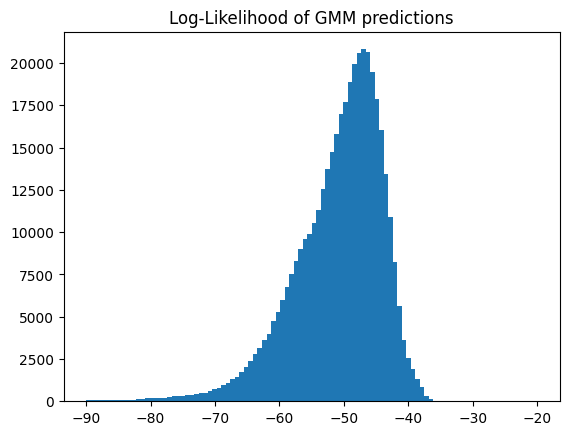

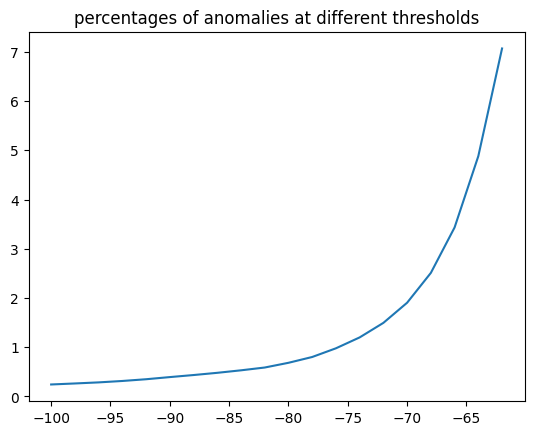

In [9]:
# Log-Likelihood of GMM predictions
plt.hist(log_likelihood, bins=100, range=(-90,-20))
plt.title('Log-Likelihood of GMM predictions')
plt.show()

# percentages of anomalies at different thresholds
percs = []
for i in range(-100, -60, 2):
    percs.append(len([x for x in log_likelihood if x < i]) / len(log_likelihood)*100)
    # print(f'{np.round(len([x for x in log_likelihood if x < i]) / len(log_likelihood) * 100,2)}% of anomalies at {i} threshold')
plt.plot(list(range(-100, -60, 2)),percs)
plt.title('percentages of anomalies at different thresholds')
plt.show()

/tmp/ipykernel_719/2321890919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['anomaly'] = [log_likelihood < th][0]
/tmp/ipykernel_719/2321890919.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['fail'] = np.where(df_x.status.isin(['off','failure']), 1, 0)
/tmp/ipykernel_719/2321890919.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

(-97.23043718765774, 0.7132551848512173, 0.0027526029791761666)


/tmp/ipykernel_719/2321890919.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x.fut_fail = df_x.groupby(['Turbine_ID'])['fut_fail'].shift(-f - w)


## Endoder

In [39]:
print(best)

(-97.23043718765774, 0.7132551848512173, 0.0027526029791761666)


In [4]:
# x columns
x_cols = [
    'Gen_RPM_Avg','Gen_Bear_Temp_Avg','Gen_Phase1_Temp_Avg','Gen_Phase2_Temp_Avg','Gen_Phase3_Temp_Avg','Hyd_Oil_Temp_Avg','Gear_Oil_Temp_Avg','Gear_Bear_Temp_Avg','Nac_Temp_Avg',
    'HVTrafo_Phase1_Temp_Avg','HVTrafo_Phase2_Temp_Avg','HVTrafo_Phase3_Temp_Avg','Grd_InverterPhase1_Temp_Avg','Cont_Top_Temp_Avg','Cont_Hub_Temp_Avg','Cont_VCP_Temp_Avg',
    'Rtr_RPM_Avg','Amb_WindSpeed_Avg','Grd_Prod_Pwr_Avg']

# get 2 months prior to the stop
df_x = df[['Timestamp','Turbine_ID'] + x_cols + ['status','logs_Remark','fail_Remark']].dropna(how='any', subset=x_cols)
x = df_x[x_cols].values

In [5]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(df_x[x_cols])

In [6]:

np.random.seed(10)
tf.random.set_seed(10)
act_func = 'elu'

# Input layer:
model=tf.keras.Sequential()
# First hidden layer, connected to input vector X.
model.add(tf.keras.layers.Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=tf.keras.regularizers.l2(0.0),
                input_shape=(X.shape[1],)
               )
         )

model.add(tf.keras.layers.Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(tf.keras.layers.Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(tf.keras.layers.Dense(X.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Train model for 100 epochs, batch size of 10:
NUM_EPOCHS=5
BATCH_SIZE=10

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                200       
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 19)                209       
                                                                 
Total params: 461 (1.80 KB)
Trainable params: 461 (1.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [17]:
pip install graphviz 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 KB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
history=model.fit(X,X,
                  batch_size=BATCH_SIZE,
                  epochs=5,
                  validation_split=0.05,
                  verbose = 1)

Epoch 1/5
19082/39624 [=============>................] - ETA: 54s - loss: 0.0060

KeyboardInterrupt: 

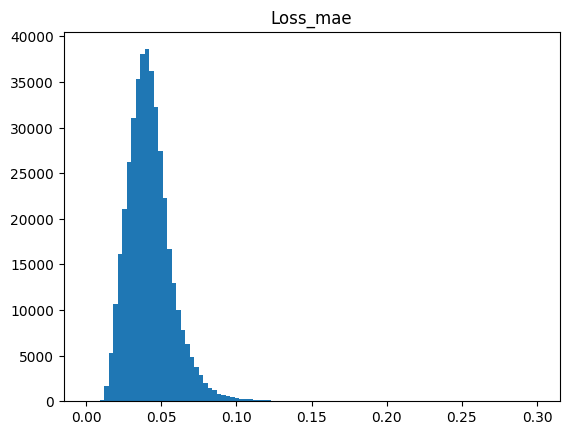

In [81]:
# X_pred = model.predict(np.array(X))
df_x['Loss_mae'] = np.mean(np.abs(X_pred-X), axis = 1)

plt.hist(df_x['Loss_mae'], bins=100, range=(0,0.3))
plt.title('Loss_mae')
plt.show()

In [77]:
# choose a threshold to get a similar number of anomalies
df_x['anomaly_nn'] = np.where(df_x['Loss_mae'] > 0.1092, 1, 0)
print(df_x.anomaly_nn.mean())

# threshold
for th in np.arange(0.105, 0.13, 0.0005):
    df_x['anomaly'] = [df_x['Loss_mae'] > th][0]

    # evaluate anomaly as indicator for failures in future time window
    w = int(60*24*7/10)*3 # weeks window
    f = int(60*24*7/10)*4 # weeks ahead for window start

    df_x['fail'] = np.where(df_x.status.isin(['off','failure']), 1, 0)
    df_x['fut_fail'] = np.where(df_x.status.isin(['off','failure']), 1, 0)
    df_x.fut_fail = df_x.groupby('Turbine_ID')['fut_fail'].rolling(window=w, min_periods=1).max().reset_index(level=0, drop=True)
    df_x.fut_fail = df_x.groupby(['Turbine_ID'])['fut_fail'].shift(-f - w)

    print(f'Threshold {th}, {np.round((df_x[df_x.anomaly==1].anomaly * df_x[df_x.anomaly==1].fut_fail).mean()*100,2)} precision, {np.round(df_x.anomaly.mean()*100,3)}% of anomalies')
    # print(f'{np.round((df_x[df_x.anomaly==1].anomaly * df_x[df_x.anomaly==1].fut_fail).mean()*100,2)} true positives')
print(f'Baseline {np.round((df_x.fut_fail).mean()*100,2)}%')

0.002821939681938387
Threshold 0.105, 44.76 precision, 0.356% of anomalies
Threshold 0.1055, 45.21 precision, 0.346% of anomalies
Threshold 0.106, 45.65 precision, 0.337% of anomalies
Threshold 0.1065, 46.1 precision, 0.328% of anomalies
Threshold 0.107, 46.2 precision, 0.319% of anomalies
Threshold 0.1075, 46.21 precision, 0.312% of anomalies
Threshold 0.108, 46.16 precision, 0.304% of anomalies
Threshold 0.1085, 46.23 precision, 0.295% of anomalies
Threshold 0.109, 46.35 precision, 0.286% of anomalies
Threshold 0.1095, 46.77 precision, 0.276% of anomalies
Threshold 0.11, 47.31 precision, 0.269% of anomalies
Threshold 0.1105, 47.28 precision, 0.262% of anomalies
Threshold 0.111, 47.23 precision, 0.257% of anomalies
Threshold 0.1115, 47.29 precision, 0.252% of anomalies
Threshold 0.112, 47.29 precision, 0.246% of anomalies
Threshold 0.1125, 47.1 precision, 0.24% of anomalies
Threshold 0.113, 47.1 precision, 0.235% of anomalies
Threshold 0.1135, 47.46 precision, 0.23% of anomalies
Thres

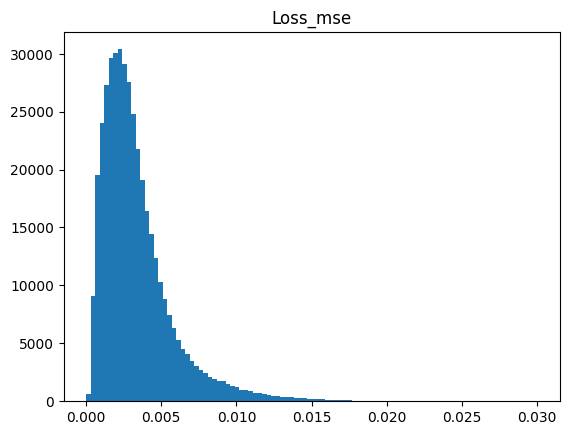

In [83]:
# X_pred = model.predict(np.array(X))
df_x['Loss_mse'] = np.mean((X_pred-X)**2, axis = 1)

plt.hist(df_x['Loss_mse'], bins=100, range=(0,0.03))
plt.title('Loss_mse')
plt.show()

In [91]:
# choose a threshold to get a similar number of anomalies
df_x['anomaly_nn'] = np.where(df_x['Loss_mse'] > 0.1092, 1, 0)
print(df_x.anomaly_nn.mean())

# threshold
for th in np.arange(0.00505, 0.019, 0.00005):
    df_x['anomaly'] = [df_x['Loss_mse'] > th][0]

    # evaluate anomaly as indicator for failures in future time window
    w = int(60*24*7/10)*3 # weeks window
    f = int(60*24*7/10)*4 # weeks ahead for window start

    df_x['fail'] = np.where(df_x.status.isin(['off','failure']), 1, 0)
    df_x['fut_fail'] = np.where(df_x.status.isin(['off','failure']), 1, 0)
    df_x.fut_fail = df_x.groupby('Turbine_ID')['fut_fail'].rolling(window=w, min_periods=1).max().reset_index(level=0, drop=True)
    df_x.fut_fail = df_x.groupby(['Turbine_ID'])['fut_fail'].shift(-f - w)

    print(f'Threshold {th}, {np.round((df_x[df_x.anomaly==1].anomaly * df_x[df_x.anomaly==1].fut_fail).mean()*100,2)} precision, {np.round(df_x.anomaly.mean()*100,3)}% of anomalies')
    # print(f'{np.round((df_x[df_x.anomaly==1].anomaly * df_x[df_x.anomaly==1].fut_fail).mean()*100,2)} true positives')
print(f'Baseline {np.round((df_x.fut_fail).mean()*100,2)}%')

0.00024694969179239924
Threshold 0.00505, 41.53 precision, 17.352% of anomalies
Threshold 0.0050999999999999995, 41.48 precision, 16.959% of anomalies
Threshold 0.005149999999999999, 41.53 precision, 16.603% of anomalies
Threshold 0.005199999999999999, 41.58 precision, 16.237% of anomalies
Threshold 0.005249999999999999, 41.6 precision, 15.874% of anomalies
Threshold 0.005299999999999998, 41.6 precision, 15.506% of anomalies
Threshold 0.005349999999999998, 41.6 precision, 15.173% of anomalies
Threshold 0.005399999999999998, 41.62 precision, 14.835% of anomalies
Threshold 0.005449999999999997, 41.61 precision, 14.519% of anomalies
Threshold 0.005499999999999997, 41.54 precision, 14.222% of anomalies
Threshold 0.005549999999999997, 41.54 precision, 13.904% of anomalies
Threshold 0.0055999999999999965, 41.5 precision, 13.617% of anomalies
Threshold 0.005649999999999996, 41.52 precision, 13.325% of anomalies
Threshold 0.005699999999999996, 41.48 precision, 13.043% of anomalies
Threshold 0.